## The quantum pigeonhole paradox

Hi! I'm Maria, and I am transforming quantum thought experiments into quantum circuits using Qiskit. In the latest installment of the Quantum Paradoxes content series, I explain how a quantum thought experiment can appear to violate the pigeonhole principle—a fundamental principle in classical mathematics. . In this notebook, I will show you how to count quantum pigeons using Qiskit, to see how the pigeonhole principle may not actually be violated after all. If you haven't already, take a look at my video about the quantum pigeonhole paradox on the [Qiskit YouTube channel](https://www.youtube.com/c/qiskit).

The pigeonhole principle is a foundational concept in mathematics which states that, when you place three pigeons into two pigeonholes, at least two will go into the same hole. This may seem obvious, but this principle is very fundamental in mathematics, and many other mathematical results depend on the assumption that the pigeonhole principle must be true. 

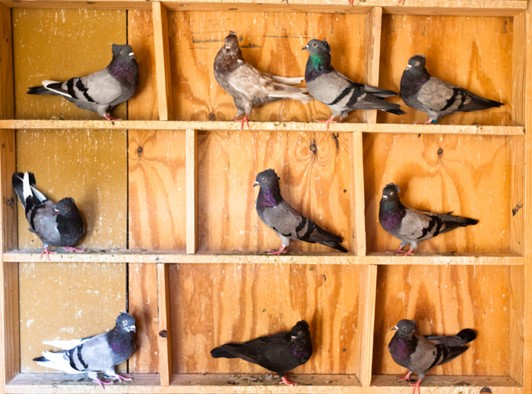

To test the pigeonhole principle with quantum circuits, let's represent each of our three pigeons as a qubit. The 0 state represents the pigeon being in a pigeonhole labeled “0,” and the 1 state represents the pigeon being in a pigeonhole labeled “1.” Each quantum pigeon can be in hole 0, hole 1, or a superposition of both. 

We are going to start each of our three quantum pigeons in a superposition of both holes, so the qubits are in the |+++> state where |+> = |0> + |1>. 

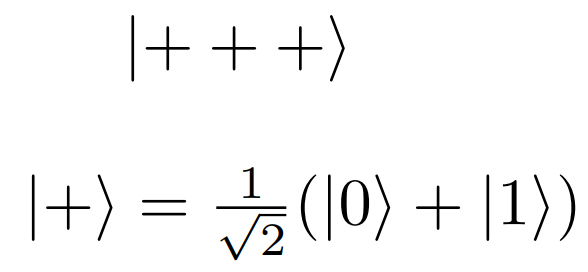

If all three quantum pigeons began in hole 0, we need to apply a Hadamard gate to each qubit to prepare the superpositions: 

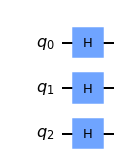

In [1]:
from qiskit import QuantumCircuit 

q_pigeons = QuantumCircuit(3)
q_pigeons.h([0,1,2])

q_pigeons.draw(output="mpl")

Next we measure each of our quantum pigeons, in the y-basis. The basis vectors of the y-basis are |+i> = |0> + i|1> and |-i> = |0> - i|1>.

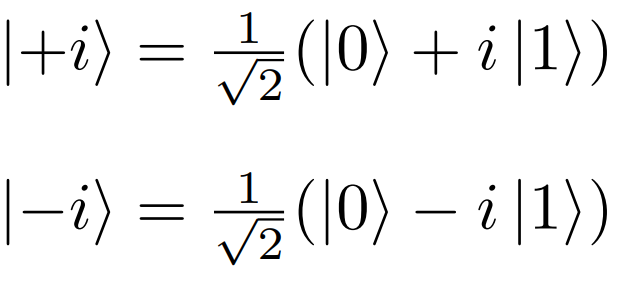

One way of performing a measurement in the y-basis is by applying S-dagger, Hadamard, S, and then a z-basis measurement: 

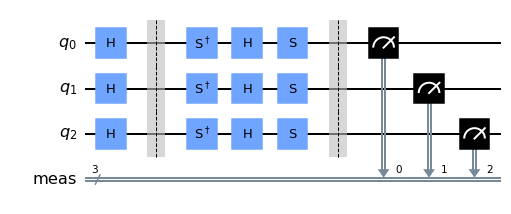

In [2]:
q_pigeons = QuantumCircuit(3)

q_pigeons.h([0,1,2])

q_pigeons.barrier()

q_pigeons.sdg([0,1,2])

q_pigeons.h([0,1,2])

q_pigeons.s([0,1,2])

q_pigeons.measure_all()

q_pigeons.draw(output="mpl")

Now let's simulate this circuit to see the outcome of the y-basis measurements:

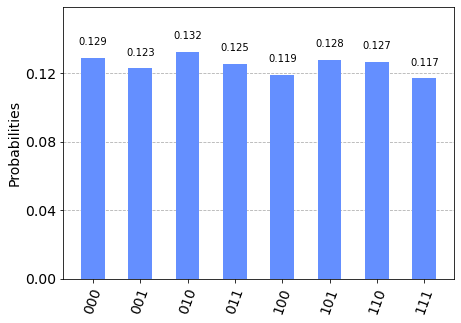

In [3]:
# Running the circuit 

from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(q_pigeons, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

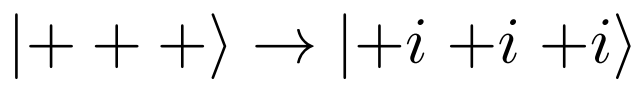

Next, we are going to post-select on a particular outcome. Post-selection means we choose an outcome of the quantum circuit that we are interested in, and discard the other outcomes. In this case, we are interested in cases where the y-basis measurement gives an outcome of 000. This indicates that the qubits were in the state |+i +i +i>. 

Now between us preparing our |+++> state and measuring our |+i +i +i> state, we want to check if there was more than one quantum pigeon in each hole. We could check whether the first two quantum pigeons are in the same hole by adding C-NOT gates controlled on qubits 0 and 1, and targeted on an extra auxillary qubit. If qubits 0 and 1 are both in the 0 state or both in the 1 state, then either zero or two NOT gates will be applied to the extra qubit, and it will be a 0. If qubits 0 and 1 are in different states, then one NOT gate will be applied to the extra qubit and it will flip to a 1. So, we can measure the extra qubit to find out if the first two qubits are in the same state or not: 

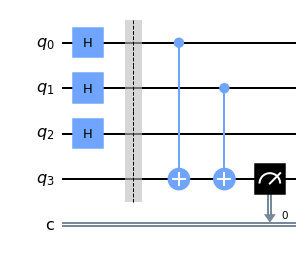

In [4]:
q_pigeons_same = QuantumCircuit(4,1)

q_pigeons_same.h([0,1,2])

q_pigeons_same.barrier()

q_pigeons_same.cx([0,1],[3,3])

q_pigeons_same.measure(3,0)

q_pigeons_same.draw(output="mpl")

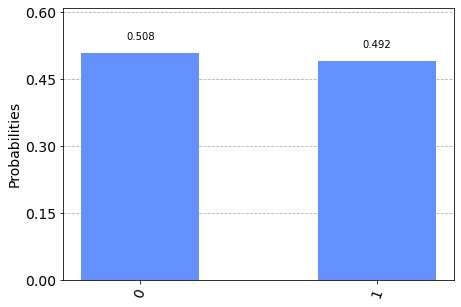

In [5]:
# Running the circuit 

job = simulator.run(q_pigeons_same, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_same)

plot_histogram(counts)

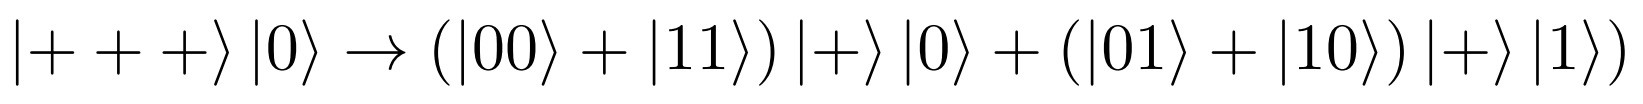

Our C-NOTs turned the |+++>|0> state into the state (|00> + |11>)|+>|0> + (|01> + |10>)|+>|1>. We can see from this that if we get the measurement outcome 0 on our extra qubit, then the three quantum pigeons are projected onto the state (|00> + |11>)|+>. Now let's calculate the overlap of this state with our |+i +i +i> outcome:  

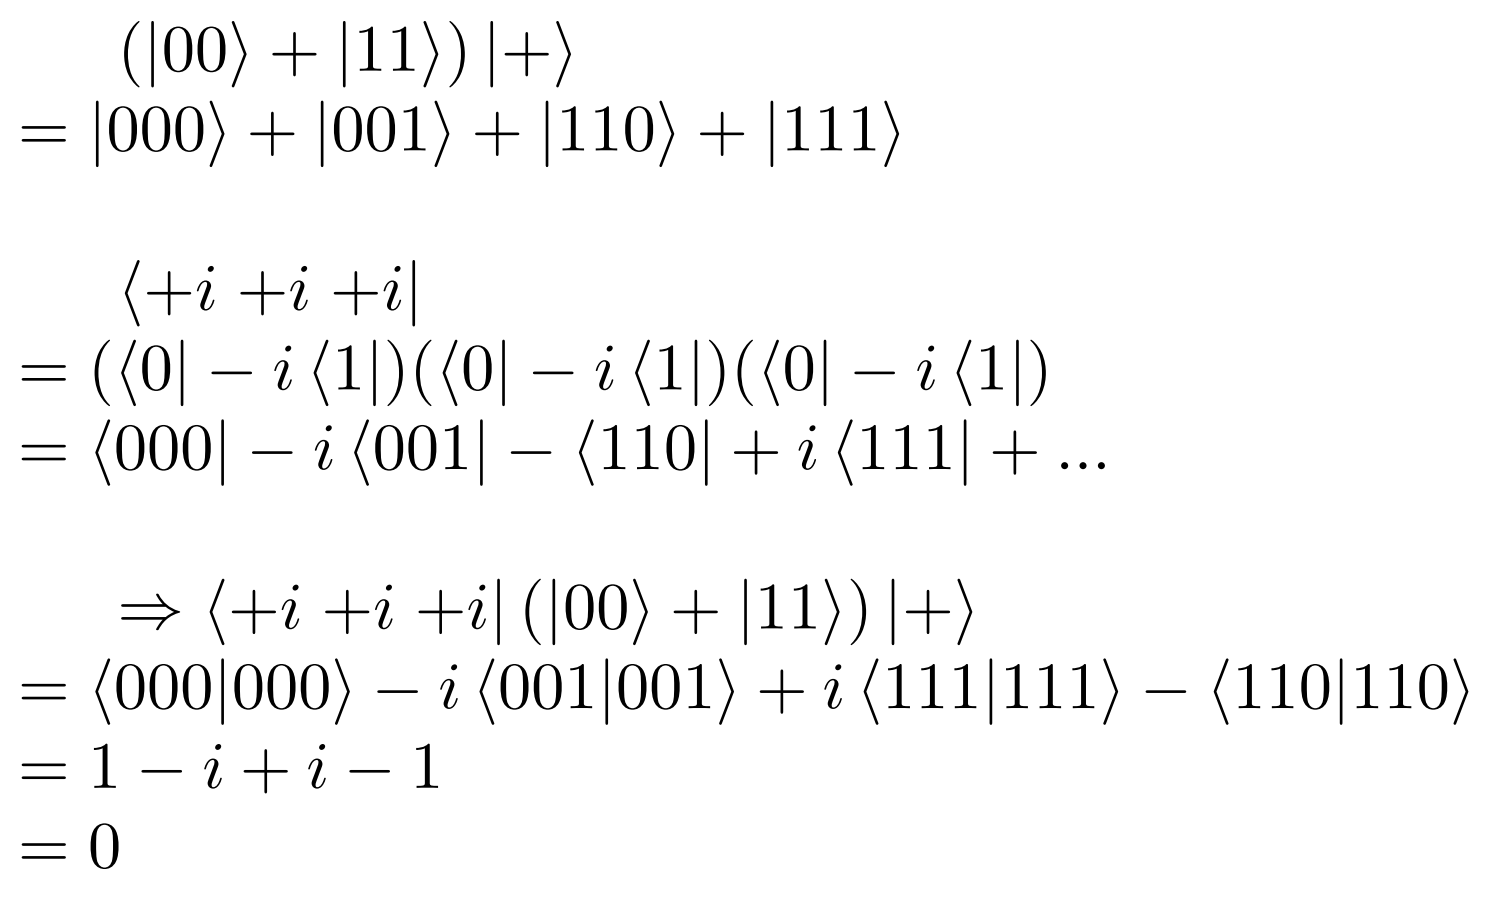

The inner product of the two states is 0, meaning that there is no overlap between the state where the first two qubits are projected into the state, and the outcome where our y-measurements give 000. So given that we got a 000 outcome, we know that the first two pigeons were not in the same hole before our measurement. 

Now we could follow a similar process to check if the 2nd and 3rd quantum pigeons were in the same hole, and if the 1st and 3rd pigeons were in the same hole. We can see that by symmetry, we will also find that there is again no overlap between the |+i +i +i> state and the states where the pairs of qubits end up in the same state. So somehow, when we get the outcome |+i +i +i>, we know that before we made our measurement, no pair of qubits was in the same state. 

This means that we've managed to fit our three quantum pigeons into two pigeonholes, with no two pigeons being in the same hole. We have violated the pigeonhole principle!

Does this mean we need to rethink the fundamentals of how to count when we use quantum mechanics? Not necessarily. The pigeonhole paradox only emerges when we consider the outcomes of measurements that could have been made, but were not. If we actually make the measurement to check if each pair of qubits is in the same state, then perform y-measurements on the other three qubits, they never end up in the |+i +i +i> state if a pair of qubits is in the same state:  

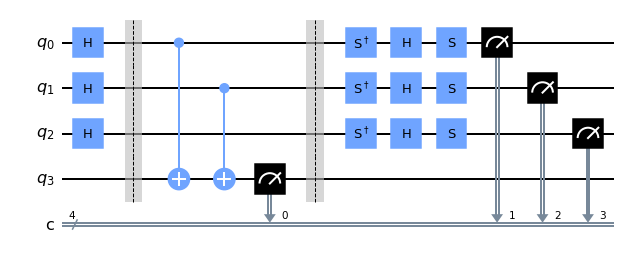

In [6]:
q_pigeons_combined = QuantumCircuit(4,4)

q_pigeons_combined.h([0,1,2])

q_pigeons_combined.barrier()

q_pigeons_combined.cx([0,1],[3,3])

q_pigeons_combined.measure(3,0)

q_pigeons_combined.barrier()

q_pigeons_combined.sdg([0,1,2])

q_pigeons_combined.h([0,1,2])

q_pigeons_combined.s([0,1,2])

q_pigeons_combined.measure([0,1,2],[1,2,3])

q_pigeons_combined.draw(output="mpl")

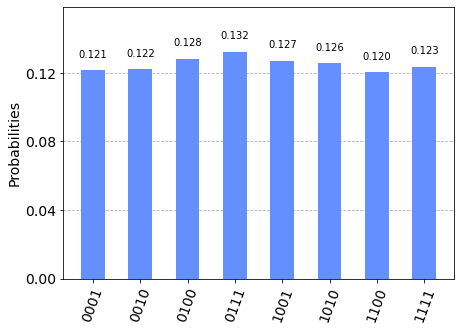

In [7]:
# Running the circuit 

job = simulator.run(q_pigeons_combined, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_combined)

plot_histogram(counts)

There is no 0000 state on the histogram, showing that there is no case where the first pair of qubits is the same and the outcome is |+i +i +i>. Critics of the pigeonhole paradox say that the measurement we would make to check if two qubits are in the same state itself changes the state, so we can't draw conclusions about the qubits if we never actually made the measurement. 

Another issue with the proposed paradox is that we can also check if there are multiple pigeons in the same hole by asking our quantum circuit a different question. Instead of asking whether each pair of pigeons is in the same hole, we could ask whether all three pigeons are in the same hole. Let's have a go: 

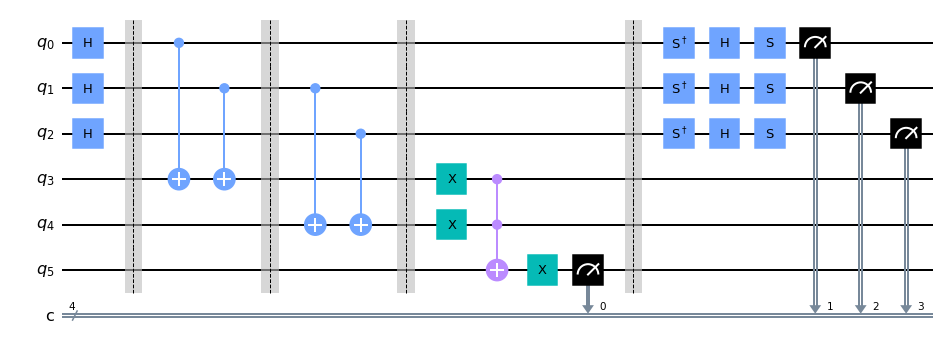

In [8]:
q_pigeons_triple = QuantumCircuit(6,4)

q_pigeons_triple.h([0,1,2])

q_pigeons_triple.barrier()

q_pigeons_triple.cx([0,1],[3,3]) # Check if qubits 0 and 1 are the same

q_pigeons_triple.barrier()

q_pigeons_triple.cx([1,2],[4,4]) # Check if qubits 1 and 2 are the same

q_pigeons_triple.barrier()

q_pigeons_triple.x([3,4]) #Check if both pairs of qubits are the same, meaning all three are the same

q_pigeons_triple.ccx(3,4,5)
q_pigeons_triple.x(5)

q_pigeons_triple.measure(5,0)

q_pigeons_triple.barrier()

q_pigeons_triple.sdg([0,1,2])

q_pigeons_triple.h([0,1,2])

q_pigeons_triple.s([0,1,2])

q_pigeons_triple.measure([0,1,2],[1, 2, 3])

q_pigeons_triple.draw(output="mpl")

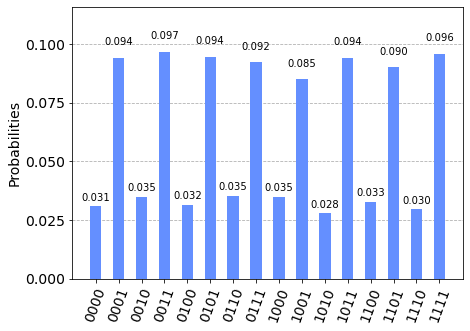

In [9]:
# Running the circuit 

job = simulator.run(q_pigeons_triple, shots=8000)
result = job.result()
counts = result.get_counts(q_pigeons_triple)

plot_histogram(counts)

Now the outcome 0000 has some chance of occurring, meaning that the outcome |+i +i +i> is compatible with all three quantum pigeons being in the same hole. 

You'll find a similar result if you count in yet another way, and just check the state of each qubit with a C-NOT gate between each one and an extra qubit, then measure the extra qubits. It is only when we check each pair of pigeons individually that we find they cannot have been in the same state. Unlike classical pigeons, quantum pigeons rearrange themselves depending on how you count them. 

The pigeonhole paradox combines entanglement, measurement and debatable reasoning about post-selection to challenge our basic rules of counting. You can play around with this thought experiment by adding more quantum pigeons or changing the ways you count them. Can you create your own new counterintuitive pigeonhole paradox, or make a circuit to support the idea that there are no problems with quantum counting after all?